In [1]:
%pylab notebook

import os, sys, pandas as pd
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')

import hts_fitting as hts

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
fluence_data_files = [
    '/Users/alexisdevitre/Desktop/Thesis figures/chapter 5/cold_vs_warm/77K/ffj6/fluence/Proton_2023_10_23-ffj6.xlsx', 
]

In [12]:
fpath = fluence_data_files[0]

def get_fluence_steps(fpath):
    return pd.read_excel(fpath, sheet_name='fluence_steps', usecols=[0, 1, 2], names=['step', 'step_fluence', 'cumulated_fluence'])

get_fluence_steps(fpath)

,step,step_fluence,cumulated_fluence
0,step00,0.000000e+00,0.000000e+00
1,step01,1.900529e+19,1.900529e+19
2,step02,1.336545e+19,3.237074e+19
3,step03,2.973559e+19,6.210633e+19
4,step04,6.015388e+19,1.222602e+20
5,step05,6.233450e+19,1.845947e+20
6,step06,7.022056e+19,2.548153e+20
7,step07,2.672744e+19,2.815427e+20


In [12]:
fpaths = [
    '77K/ffj6/Ic/0_degradation/ffj6-degradation.xlsx',
    '20K/ffj23/Ic/0_degradation/ffj23-degradation.xlsx',
    '25K/amsc1/Ic/0_degradation/amsc1-degradation.xlsx',
    '200K/ffj24/Ic/0_degradation/ffj24-degradation.xlsx',
    '300K/amsc2/Ic/0_degradation/amsc2-degradation.xlsx',
    '300K/ffj26/Ic/0_degradation/ffj26-degradation.xlsx'
    
]

labels = [
    'ffj06, $T^{irr}$ = 77 K',
    'ffj23, $T^{irr}$ = 20 K',
    'amsc1, $T^{irr}$ = 25 K',
    'ffj24, $T^{irr}$ = 200 K',
    'amsc2, $T^{irr}$ = 300 K',
    'ffj26, $T^{irr}$ = 300 K'
]

tgroups = [
    '[77.2, 77.4)',
    '[77.1, 77.3)',
    '[79.0, 80.0)',
    '[77.0, 77.4)',
    '[80.0, 81.1)',
    '[76.9, 77.3)'
]

colors = ['b', 'b', 'b', 'cyan', 'r', 'r']

markers = ['o', 'd', 's', '*', 'P', 'X']

<IPython.core.display.Javascript object>


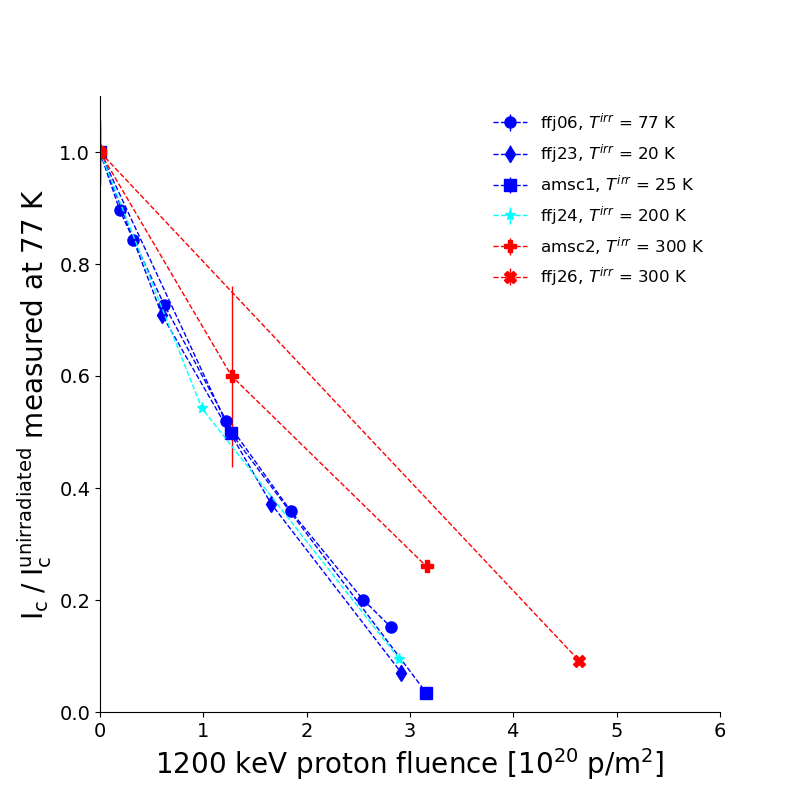

In [13]:
fig, ax = plt.subplots()
ax.set_ylabel('$\mathrm{I_c\; /\; I_c^{unirradiated}}$ measured at 77 K')
ax.set_xlabel('1200 keV proton fluence [$\mathrm{10^{20}\; p/m^2}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 6)

for fpath, tgroup, l, c, m in zip(fpaths, tgroups, labels, colors, markers):
    data = pd.read_excel(fpath, sheet_name='aggregates')
    data = data[data.temperature_group == tgroup]

    y0 = data.ic_mean[data.cumulated_fluence == 0].values[0]

    x = data.cumulated_fluence/1e20
    y = data.ic_mean/y0
    yerr = data.ic_std/y0

    ax.errorbar(x=x, y=y, yerr=yerr, marker=m, linestyle='--', linewidth=1, markersize=8, color=c, label=l)


ax.legend(frameon=False)



<IPython.core.display.Javascript object>


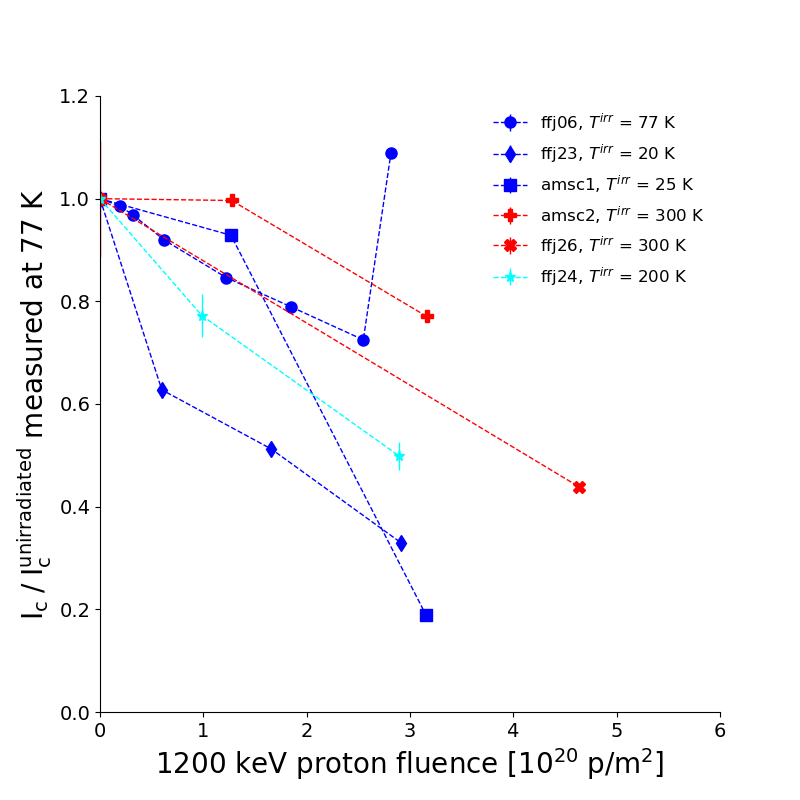

In [11]:
fig, ax = plt.subplots()
ax.set_ylabel('$\mathrm{I_c\; /\; I_c^{unirradiated}}$ measured at 77 K')
ax.set_xlabel('1200 keV proton fluence [$\mathrm{10^{20}\; p/m^2}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 1.2)
ax.set_xlim(0, 6)

for fpath, tgroup, l, c, m in zip(fpaths, tgroups, labels, colors, markers):
    data = pd.read_excel(fpath, sheet_name='aggregates')
    data = data[data.temperature_group == tgroup]

    y0 = data.n_mean[data.cumulated_fluence == 0].values[0]

    x = data.cumulated_fluence/1e20
    y = data.n_mean/y0
    yerr = data.n_std/y0

    ax.errorbar(x=x, y=y, yerr=yerr, marker=m, linestyle='--', linewidth=1, markersize=8, color=c, label=l)


ax.legend(frameon=False)

